<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-joseovalle_A01150742/blob/main/Actividad_semanal_6__visualizaci%C3%B3n_A01150742.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


> # Alumno: José Ovalle Alvarado
> # Matrícula: A0150742
> # Materia: Ciencia y Analítica de Datos
> # Profesor: María de la Paz Rico Fernández
> # Fecha: 29/10/2022
> # Actividad Semanal 6: Visualización de Datos

**INTRODUCCCIÓN**

El siguiente análisis corresponde a un estudio descriptivo de comportamiento y análisis crediticio para diferentes clientes. El dataset muestra la probabilidad de "default" de los clientes y hace referencia a un problema de clasificación.

In [237]:
# cargar librerías
import pandas as pd
import numpy as np

**1. Descarga los datos y carga el dataset en tu libreta**

In [238]:
# referenciar url

url = 'https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'

In [239]:
# generar dataframe

df = pd.read_csv(url)

**2. Obten la información del DataFrame con los métodos y propiedades: shape, columns, head(), dtypes, info(), isna()**

In [240]:
# shape
shape = df.shape
print(shape)
# el dataset tiene 30,000 registros y 25 columnas

(30000, 25)


In [241]:
# columns
columns = df.columns
columns


Index(['ID', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [242]:
# head() revisar algunos ejemplos de los datos
df.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [243]:
# renombrar columnas
headers = {
 "ID": "ID"   
,"X1": "credit_amt"    
,"X2": "gender"
,"X3": "education"
,"X4": "marital_status"
,"X5": "age"
,"X6": "pay_stat_sep"
,"X7": "pay_stat_aug"
,"X8": "pay_stat_jul"
,"X9": "pay_stat_jun"
,"X10": "pay_stat_may"
,"X11": "pay_stat_apr"
,"X12": "bill_amt_sep"
,"X13": "bill_amt_aug"
,"X14": "bill_amt_jul"
,"X15": "bill_amt_jun"
,"X16": "bill_amt_may"
,"X17": "bill_amt_apr"
,"X18": "pay_amt_sep"
,"X19": "pay_amt_aug"
,"X20": "pay_amt_jul"
,"X21": "pay_amt_jun"
,"X22": "pay_amt_may"
,"X23": "pay_amt_apr"
,"Y"  : "proba_def"
}

df = df.rename(columns=headers)
df.head()

,ID,credit_amt,gender,education,marital_status,age,pay_stat_sep,pay_stat_aug,pay_stat_jul,pay_stat_jun,...,bill_amt_jun,bill_amt_may,bill_amt_apr,pay_amt_sep,pay_amt_aug,pay_amt_jul,pay_amt_jun,pay_amt_may,pay_amt_apr,proba_def
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [244]:
types = pd.DataFrame(df.dtypes, index = None)
types

,0
ID,int64
credit_amt,int64
gender,float64
education,float64
marital_status,float64
age,float64
pay_stat_sep,float64
pay_stat_aug,float64
pay_stat_jul,float64
pay_stat_jun,float64


In [245]:
# revisión de valores nulos / 'na'
na_ = pd.DataFrame(df.isna().any())
na_


,0
ID,False
credit_amt,False
gender,True
education,True
marital_status,True
age,True
pay_stat_sep,True
pay_stat_aug,True
pay_stat_jul,True
pay_stat_jun,True


**3. Limpia los datos eliminando los registros nulos o rellena con la media de la columna**

In [246]:
# missing values per feature

# Existen datos perdidos en todas las variables a excepción de la variable credito

missing_values = pd.DataFrame(df.isnull().any()) 

missing_values = missing_values.reset_index()

missing_values = missing_values.rename(columns={"index":"feature",0:"missing_values"})

missing_values[missing_values["missing_values"] == True]

features_list = list(missing_values["feature"][missing_values["missing_values"] == True])

feat = []
miss = []
for feature in features_list:
  print(feature +' feature has ' + str(df[feature].isnull().sum()) + ' missing_value(s) out of ' + str(len(df))  + ' values\n')
  feat.append(feature)
  miss.append(df[feature].isnull().sum())

gender feature has 1 missing_value(s) out of 30000 values

education feature has 2 missing_value(s) out of 30000 values

marital_status feature has 2 missing_value(s) out of 30000 values

age feature has 5 missing_value(s) out of 30000 values

pay_stat_sep feature has 3 missing_value(s) out of 30000 values

pay_stat_aug feature has 5 missing_value(s) out of 30000 values

pay_stat_jul feature has 7 missing_value(s) out of 30000 values

pay_stat_jun feature has 9 missing_value(s) out of 30000 values

pay_stat_may feature has 16 missing_value(s) out of 30000 values

pay_stat_apr feature has 14 missing_value(s) out of 30000 values

bill_amt_sep feature has 11 missing_value(s) out of 30000 values

bill_amt_aug feature has 11 missing_value(s) out of 30000 values

bill_amt_jul feature has 13 missing_value(s) out of 30000 values

bill_amt_jun feature has 15 missing_value(s) out of 30000 values

bill_amt_may feature has 17 missing_value(s) out of 30000 values

bill_amt_apr feature has 10 missin

In [247]:
# se eliminan valores nulos ya que no es una cantidad significativa de valores nulos
copy_df = df.copy()
copy_df.dropna(inplace = True)
copy_df.head()

,ID,credit_amt,gender,education,marital_status,age,pay_stat_sep,pay_stat_aug,pay_stat_jul,pay_stat_jun,...,bill_amt_jun,bill_amt_may,bill_amt_apr,pay_amt_sep,pay_amt_aug,pay_amt_jul,pay_amt_jun,pay_amt_may,pay_amt_apr,proba_def
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


**4. Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión**

In [248]:
copy_df.describe()

,ID,credit_amt,gender,education,marital_status,age,pay_stat_sep,pay_stat_aug,pay_stat_jul,pay_stat_jun,...,bill_amt_jun,bill_amt_may,bill_amt_apr,pay_amt_sep,pay_amt_aug,pay_amt_jul,pay_amt_jun,pay_amt_may,pay_amt_apr,proba_def
count,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,...,29958.000000,29958.000000,29958.000000,29958.000000,2.995800e+04,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000
mean,15005.550504,167555.900928,1.604012,1.853094,1.551739,35.483443,-0.017124,-0.134021,-0.166767,-0.221110,...,43279.335370,40328.984578,38889.925763,5664.614460,5.925715e+03,5228.429969,4829.873556,4801.481574,5220.708025,0.221143
std,8654.547473,129737.299088,0.489070,0.790471,0.521952,9.214319,1.123989,1.197171,1.196026,1.168419,...,64364.684347,60826.219326,59582.883301,16568.823518,2.305598e+04,17617.338167,15676.205514,15285.552652,17788.983767,0.415023
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7516.250000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2327.500000,1762.250000,1256.000000,1000.000000,8.352500e+02,390.000000,296.250000,253.250000,118.000000,0.000000
50%,15005.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19037.500000,18104.500000,17067.500000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,22497.750000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54551.250000,50220.750000,49234.750000,5007.000000,5.000000e+03,4511.500000,4014.750000,4040.000000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


**Las medidas de tendencia central que pueden ser analizadas en este caso son la media "mean" y la mediana representada por el percentil 50. Pero para poder analizar las variables de forma simultánea es necesario escalarlas, lo cual se realizará en los siguientes pasos del notebook a través de un gráfico BOXPLOT**

**5. Realiza el conteo de las variables categóricas**

In [249]:
# Tomando en cuenta la información proporcionada de la cuenta de github :


# X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
# X2: Gender (1 = male; 2 = female). 
# X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
# X4: Marital status (1 = married; 2 = single; 3 = others). 
# X5: Age (year). 
# X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
# X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 
# X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005. 



Las variables categóricas que se pueden analizar son las siguientes:


> Gender (1 = male; 2 = female). 

> Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 

> Marital status (1 = married; 2 = single; 3 = others). 

> History of past payments (April to Septemeber, 2005). Esta variable emplea banderas para describir las condiciones del pago o impago.


Las variables ordinal que se puede contemplar es sólo la siguiente:
> Age (years).

El resto de las variables se pueden considerar numéricas:

> Amount of given credit

> Amount of bill statement (April to Septemeber, 2005)

> Amount of previous payments (April to Septemeber, 2005)




In [250]:
categorical = ['gender', 'education', 'marital_status','pay_stat_sep', 'pay_stat_aug', 'pay_stat_jul', 'pay_stat_jun','pay_stat_may', 'pay_stat_apr']
numeric     = ['credit_amt','bill_amt_sep', 'bill_amt_aug','bill_amt_jul', 'bill_amt_jun', 'bill_amt_may', 'bill_amt_apr','pay_amt_sep', 'pay_amt_aug', 'pay_amt_jul', 'pay_amt_jun','pay_amt_may', 'pay_amt_apr','age']

A continuación se muestra como se encuntran los datos clasificados de acuerdo a sus diferentes categorías, así como sus respectivos conteos:

In [251]:
copy_df["gender"].value_counts().to_frame()

,gender
2.0,18095
1.0,11863


In [252]:
copy_df["education"].value_counts().to_frame()

,education
2.0,14009
1.0,10572
3.0,4909
5.0,280
4.0,123
6.0,51
0.0,14


In [253]:
copy_df["marital_status"].value_counts().to_frame()

,marital_status
2.0,15939
1.0,13643
3.0,322
0.0,54


In [254]:
pay_stat = ['pay_stat_sep', 'pay_stat_aug', 'pay_stat_jul', 'pay_stat_jun','pay_stat_may', 'pay_stat_apr']
copy_df[pay_stat].value_counts().to_frame()

0
pay_stat_sep pay_stat_aug pay_stat_jul pay_stat_jun pay_stat_may pay_stat_apr      
 0.0          0.0          0.0          0.0          0.0          0.0          9807
-2.0         -2.0         -2.0         -2.0         -2.0         -2.0          2109
-1.0         -1.0         -1.0         -1.0         -1.0         -1.0          1990
 1.0         -2.0         -2.0         -2.0         -2.0         -2.0           649
 2.0          2.0          2.0          2.0          2.0          2.0           529
...                                                                             ...
 1.0          2.0          2.0         -2.0         -1.0          2.0             1
                                                                 -1.0             1
-2.0         -2.0          0.0          0.0          0.0          0.0             1
 1.0          2.0          0.0          0.0          4.0          4.0             1
              1.0         -1.0         -1.0         -1.0         -1.0             1

[1105 rows x 1 columns]

**6. Escala los datos, si consideras necesario**

**Los datos que se pudieran escalar en este problema en específico son los de tipo numéricos, descritos en el apartado anterior y que serán transformados en la siguiente línea de código**:

In [255]:
numeric_features = copy_df[numeric]
numeric_features.head()

,credit_amt,bill_amt_sep,bill_amt_aug,bill_amt_jul,bill_amt_jun,bill_amt_may,bill_amt_apr,pay_amt_sep,pay_amt_aug,pay_amt_jul,pay_amt_jun,pay_amt_may,pay_amt_apr,age
0,20000,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,24.0
1,120000,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,26.0
2,90000,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,34.0
3,50000,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,37.0
4,50000,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,57.0


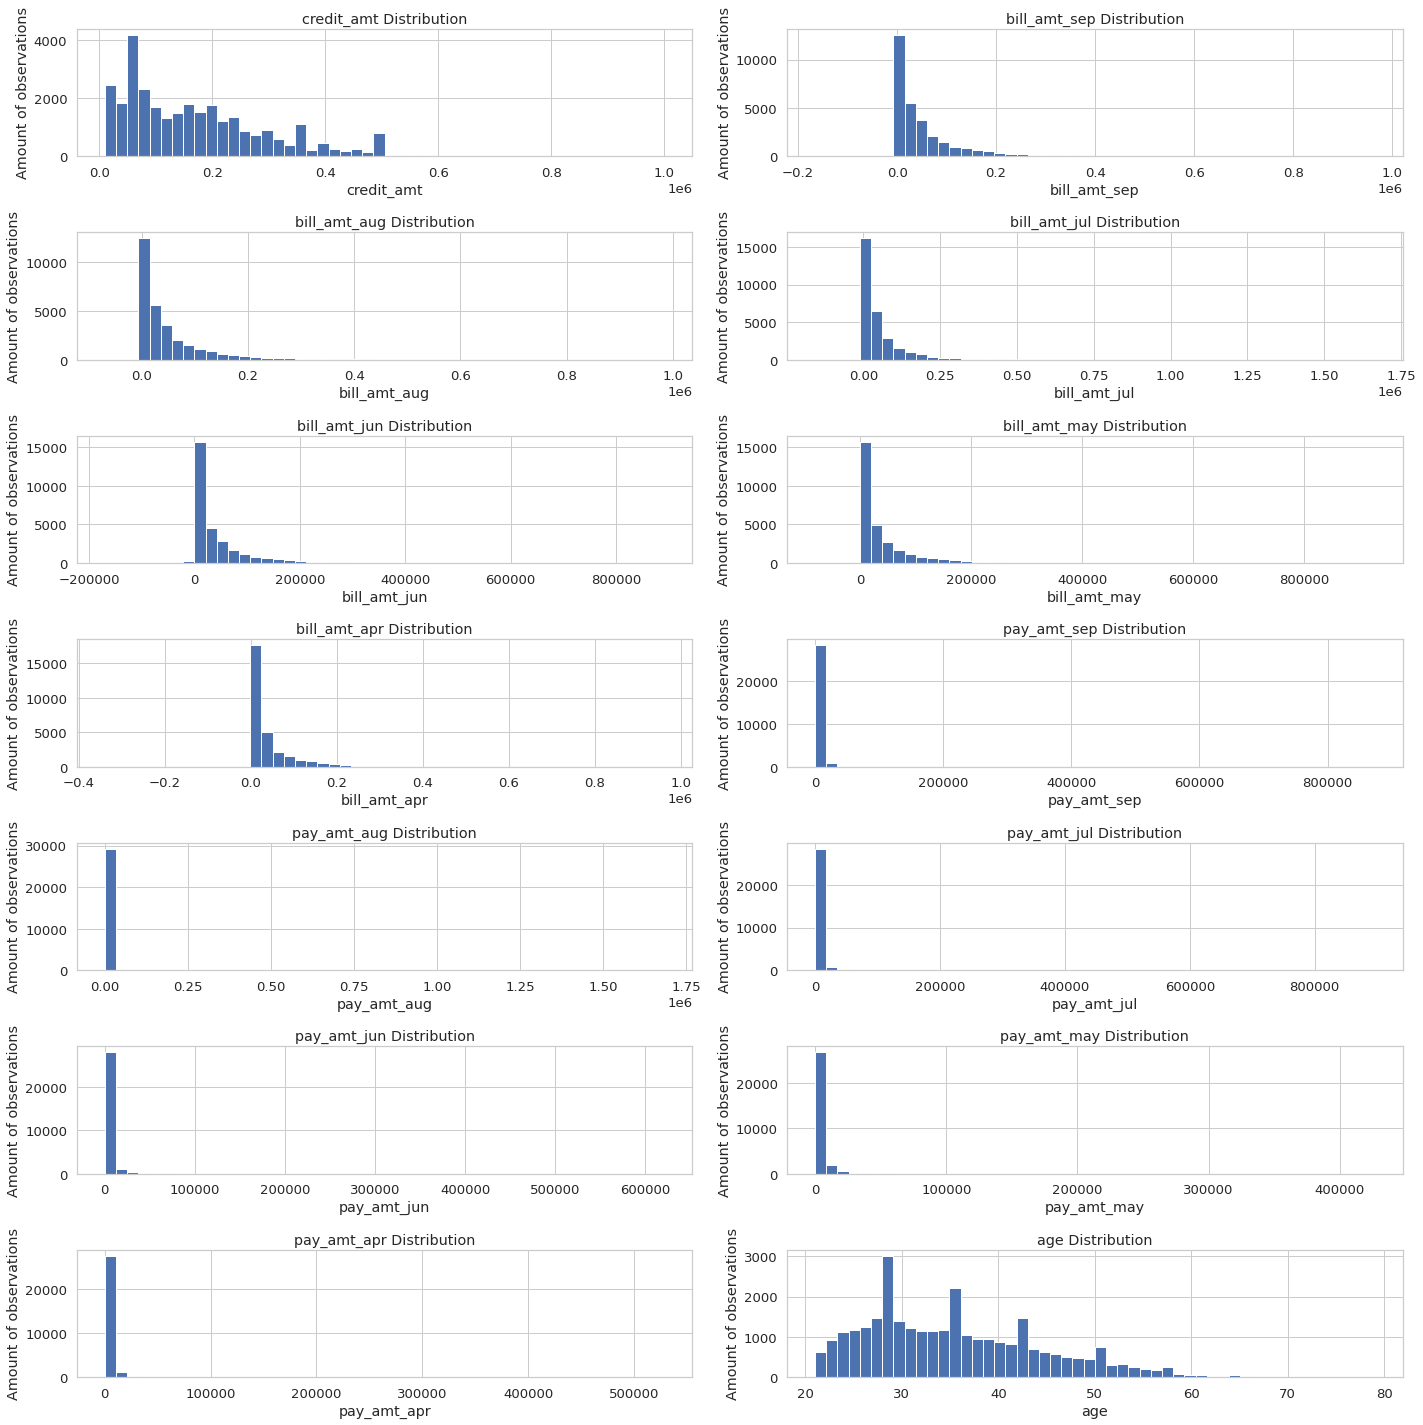

In [256]:
# análisis de distribución de variables

#plt.figure(figsize=(20,80))

xaxes   =  ['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14']
numeric =  ['credit_amt','bill_amt_sep', 'bill_amt_aug','bill_amt_jul', 'bill_amt_jun', 'bill_amt_may', 'bill_amt_apr','pay_amt_sep', 'pay_amt_aug', 'pay_amt_jul', 'pay_amt_jun','pay_amt_may', 'pay_amt_apr','age']


f,a = plt.subplots(7,2,figsize=(20,20))
#a = numeric

a = a.ravel()

for idx,ax in enumerate(a):
    ax.hist(copy_df[numeric[idx]], bins = 50)
    ax.set_title(numeric[idx]+' Distribution')
    ax.set_xlabel(numeric[idx])
    ax.set_ylabel('Amount of observations')
plt.tight_layout()

**Del análisis previo se puede observar que la mayoría de las variables presentaun un tipo de sesgo en su distribución, las unidads de medición también son diferentes por lo cual es necesario escalar las variables**

In [257]:
# realizar escalamiento min_max scaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_features)

# generar dataframe
df_scaled = pd.DataFrame(scaled_data,  index=numeric_features.index, columns=numeric_features.columns)
df_scaled.head()

,credit_amt,bill_amt_sep,bill_amt_aug,bill_amt_jul,bill_amt_jun,bill_amt_may,bill_amt_apr,pay_amt_sep,pay_amt_aug,pay_amt_jul,pay_amt_jun,pay_amt_may,pay_amt_apr,age
0,-1.137363,-0.642497,-0.647359,-0.667925,-0.672419,-0.663031,-0.652714,-0.341890,-0.227134,-0.296782,-0.308107,-0.314124,-0.293485,-1.246282
1,-0.366561,-0.659205,-0.666697,-0.639201,-0.621583,-0.606229,-0.597982,-0.341890,-0.213645,-0.240019,-0.244315,-0.314124,-0.181054,-1.029224
2,-0.597802,-0.298738,-0.493940,-0.482436,-0.449762,-0.417277,-0.391745,-0.250270,-0.191958,-0.240019,-0.244315,-0.248702,-0.012407,-0.160996
3,-0.906122,-0.057797,-0.013586,0.032552,-0.232512,-0.186929,-0.156808,-0.221179,-0.169448,-0.228667,-0.237936,-0.244188,-0.237269,0.164590
4,-0.906122,-0.578648,-0.611297,-0.161383,-0.347080,-0.348260,-0.331626,-0.221179,1.333962,0.270850,0.266021,-0.269048,-0.255314,2.335161


**7. Reduce las dimensiones con PCA, si consideras necesario.**

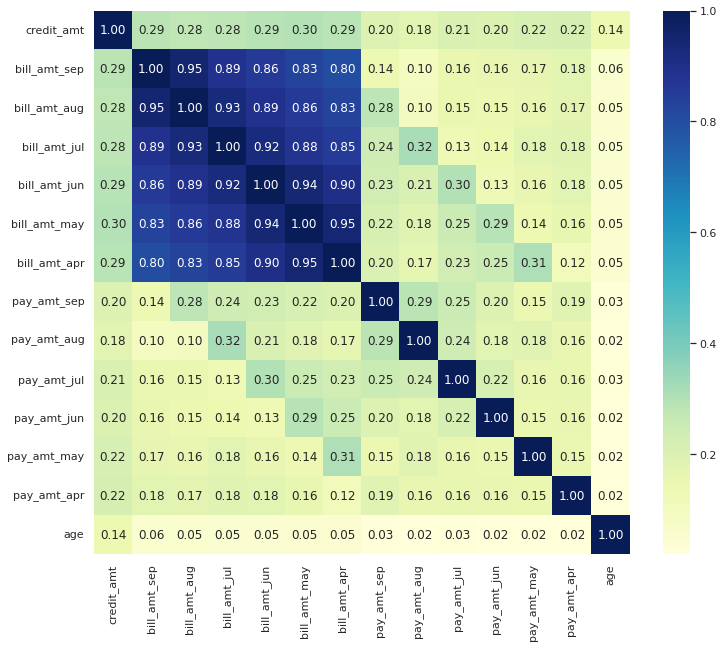

In [258]:
import seaborn as sns
# Análisis preliminar de correlación

# Correlation matrix
corr_matrix = df_scaled.corr()

# A little bigger canvas
sns.set(rc = {'figure.figsize':(12,10)})

# Heamap of correlation
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='YlGnBu')

**Dentro del análisis de la matriz de correlaciones se puede observar que los estados de cuenta de los diferentes meses están correlacionados unos con otros, por lo que estos pudieran ayudar a definir algún componente principal, esto no implica que las variables tengan que ser eliminadas del análisis a pesar de la alta correlación.**

In [259]:
# análisis de componentes principales

from sklearn.decomposition import PCA

pca = PCA()
pca_data = pca.fit_transform(df_scaled)

pcSummary = pd.DataFrame({
    'Standard deviation': np.sqrt(pca.explained_variance_),
    'Proportion of variance': pca.explained_variance_ratio_,
    'Cumulative proportion': np.cumsum(pca.explained_variance_ratio_)
})

pcSummary.insert(loc=0, column = 'PC', value = 'PC' + ( 1 + pcSummary.reset_index().index).astype(str))

pcSummary

,PC,Standard deviation,Proportion of variance,Cumulative proportion
0,PC1,2.432921,0.422779,0.422779
1,PC2,1.309882,0.122552,0.545331
2,PC3,1.022269,0.074643,0.619974
3,PC4,0.961876,0.066084,0.686058
4,PC5,0.940087,0.063124,0.749182
5,PC6,0.934241,0.062341,0.811523
6,PC7,0.882984,0.055688,0.867211
7,PC8,0.852438,0.051902,0.919113
8,PC9,0.841041,0.050523,0.969636
9,PC10,0.514249,0.018889,0.988525


**Dentro del análisis de PCA, se puede observar que con 4 componentes principales se cubre el 74.9% de la varianza, la reducción de la dimensionalidad dependerá de la distribución de las variables en los dierentes componentes**

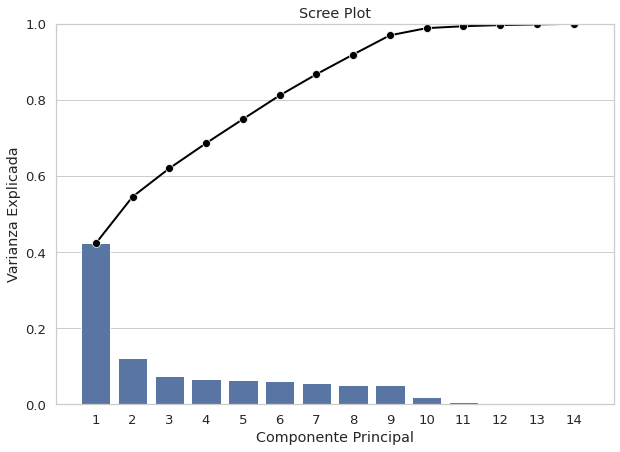

In [260]:
# gráfico de componentes principales


import matplotlib.pyplot as plt

sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

sns.barplot(x = np.arange(pca.n_components_) + 1, 
                y = pca.explained_variance_ratio_, 
                color = 'b'
                )
sns.lineplot(x = np.arange(pca.n_components_), 
                 y = np.cumsum(pca.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )


plt.title('Scree Plot')
plt.xlabel('Componente Principal')
plt.ylabel('Varianza Explicada')
plt.ylim(0, 1)
plt.show()

In [261]:
# Interpretación de componentes principales

pca_data = pd.DataFrame(pca.components_.transpose(),
             columns = pcSummary['PC'].values,
             index = df_scaled.columns
             )
pca_data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
credit_amt,0.165507,0.300709,-0.378575,-0.200103,0.035312,-0.078883,0.111239,-0.046381,-0.821996,-0.029201,-0.006198,0.015697,-0.000417,0.003345
bill_amt_sep,0.372446,-0.190793,-0.034207,-0.063899,0.041391,-0.043987,0.008169,0.009341,0.010348,0.566716,0.416018,-0.432992,-0.183793,-0.316576
bill_amt_aug,0.383253,-0.174644,-0.001814,0.007629,0.083164,-0.028824,-0.032444,-0.135636,0.016872,0.386872,0.038425,0.345052,0.329467,0.645227
bill_amt_jul,0.388264,-0.126883,0.034747,0.060528,0.113790,0.099239,-0.121162,0.093077,-0.018607,0.122863,-0.484776,0.495792,-0.086466,-0.527640
bill_amt_jun,0.391557,-0.120403,0.034073,0.074774,0.028378,0.014527,0.126494,0.039157,0.019109,-0.205260,-0.523211,-0.489647,-0.362078,0.346095
bill_amt_may,0.388505,-0.105928,0.033882,0.039553,-0.106756,-0.099290,-0.007584,0.049781,0.023701,-0.419992,0.068372,-0.249500,0.718388,-0.226667
bill_amt_apr,0.380672,-0.094157,0.018489,-0.070616,-0.164986,0.069272,0.007892,-0.000282,0.058701,-0.488861,0.513313,0.338689,-0.427734,0.072287
pay_amt_sep,0.135120,0.383194,0.173845,0.362055,0.225652,0.040574,-0.201646,-0.748694,0.019949,-0.056581,0.047513,-0.069359,-0.044841,-0.084567
pay_amt_aug,0.116768,0.408391,0.200925,0.345745,0.148714,0.408361,-0.278835,0.578491,-0.110712,0.050854,0.147307,-0.068851,0.038925,0.124894
pay_amt_jul,0.128056,0.392339,0.122065,0.244688,-0.239600,-0.108158,0.785216,0.068216,0.152990,0.144908,0.000139,0.124675,0.025427,-0.063096


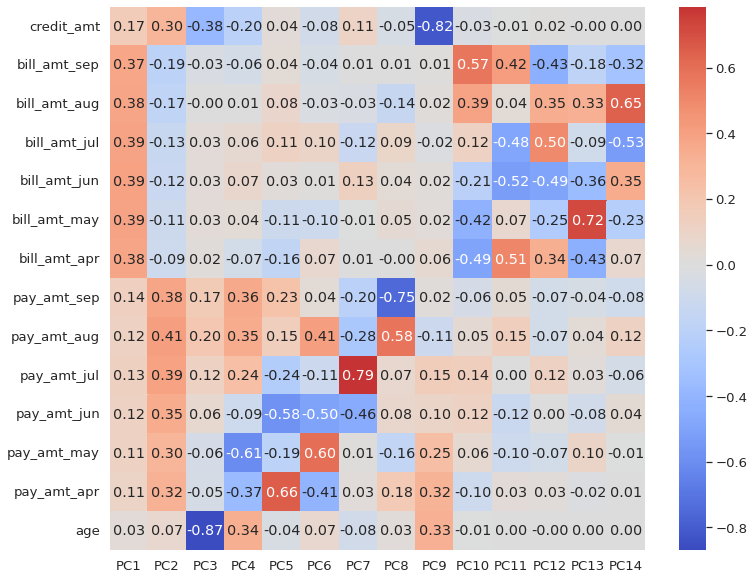

In [262]:
#sns.heatmap(pca_data, annot=True, fmt='.2f', center=0, cmap=sns.diverging_palette(10, 10, as_cmap=True))
sns.heatmap(pca_data, annot=True, fmt='.2f', center=0, cmap='coolwarm')

**Analizando la tabla superior se puede observar que para el componente principal 1 y 2, las variables de mayor importancia son los "bill amounts" y los "payment amounts". El tercer componente principal está compuesto por la edad y por por el "credit amount. Los componentes siguientes muestran combinaciones de diferentes variables**

**Después de analizar la distribución de los componentes se puede concluir que no es necesarion eliminar variables numéricas del análisis, ya que para cubir cuando menos el 70% de la variación se requiere la participación de todas las varibles actuales**.



**8. Elabora los histogramas de los atributos para visualizar su distribución**

La distribución de las variables fue descrita anteriormente, sin embargo se pueden analizar las distribuciones de los datos después de aplicar normalización.

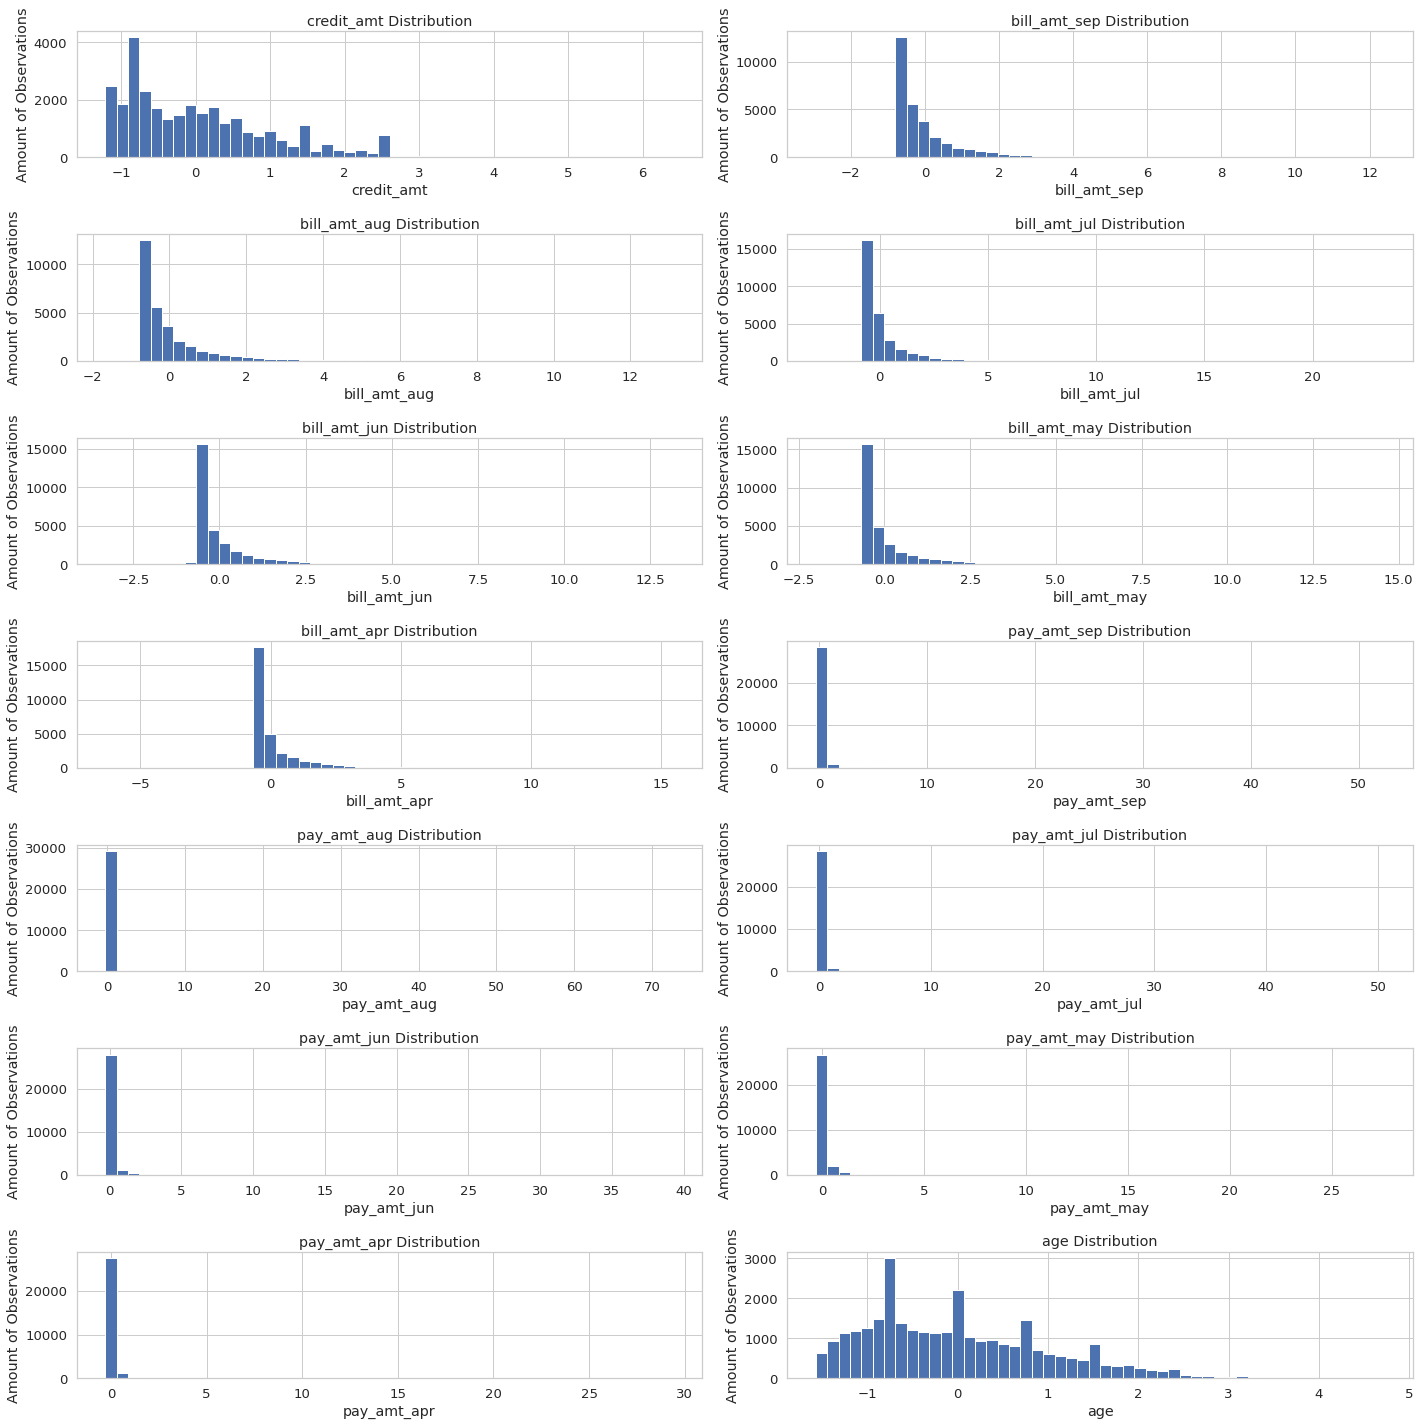

In [263]:
# análisis de distribución de variables

#plt.figure(figsize=(20,80))

xaxes   =  ['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14']
numeric =  ['credit_amt','bill_amt_sep', 'bill_amt_aug','bill_amt_jul', 'bill_amt_jun', 'bill_amt_may', 'bill_amt_apr','pay_amt_sep', 'pay_amt_aug', 'pay_amt_jul', 'pay_amt_jun','pay_amt_may', 'pay_amt_apr','age']


f,a = plt.subplots(7,2,figsize=(20,20))
#a = numeric

a = a.ravel()

for idx,ax in enumerate(a):
    ax.hist(df_scaled[numeric[idx]], bins = 50)
    ax.set_title(numeric[idx]+' Distribution')
    ax.set_xlabel(numeric[idx])
    ax.set_ylabel('Amount of Observations')
plt.tight_layout()

**9. Realiza la visualización de los datos usando por lo menos 3 gráficos que consideres adecuados: plot, scatter, jointplot, boxplot, areaplot, pie chart, pairplot, bar chart, etc.**

Dentro del análisis previo se emplearon los diferentes tipos de gráficos:


> Histogramas para distribución de comportamientos para las variables numérica

> "Screeplot" para análisis de componentes principales

> "Heatmap" para análisis de componentes principales y la importancia de las variables en los componentes. Así como el "Heatmap" de la matriz de correlaciones.



**10. Interpreta y explica cada uno de los gráficos indicando cuál es la información más relevante que podría ayudar en el proceso de toma de decisiones.**

De los gráficos previos se puede concluir lo siguiente:

> Histogramas: la mayoría de las variables numéricas NO presenta una distribución normal y se puede observar sesgo en los estados de cuenta y  pagos realizados. La edad presenta mayor variación que el resto de las variables, pero presenta un sesgo también.

> "Screeplot" para análisis de componentes principales: para cubrir cuando menos 70% de la varianza se requieren 5 componentes principales y todas las variables numéricas componen la dimensionalidad de estos componentes.

> "Heatmap" para análisis de componentes principales y la importancia de las variables en los componentes. Así como el "Heatmap" de la matriz de correlaciones. La matriz de correlaciones muestra una alta correlación entre los diferentes estados de cuenta, lo cual sugiere un posible efecto de colinearidad que puede ser estudiado.